# 第二章 机器学习分类算法

本章，我们要学习第一个公认的机器学习分类算法：感知机(perceptron)和自适应线性神经元(adaptive linear neurons)。

首先我们用Python实现感知机算法，然后将其应用于Iris数据集。编码过程可以帮助我们更好地理解分类的概念以及如何用Python实现算法。

学习自适应线性神经元算法会涉及到优化(optimization)相关的知识，为我们第三章运用scikit-learn中更加复杂的分类器打好数学基础。


本章涉及到的知识点包括：
* 对机器学习算法有直观了解
* 使用pandas、NumPy和matplotlib读取数据、处理数据和数据可视化
* 使用Python实现简单的线性分类算法






 

## 透过人工神经元一窥机器学习早期历史

在我们讨论感知机及其相关算法细节前，先让我们回顾一下机器学习早期的发展历程。为了了解大脑工作原理进而设计通用人工智能算法，Warren McCullock和Walter Pitts 在1943年首次提出了简化版脑细胞的概念，即McCullock-Pitts(MCP)神经元(*A Logical Calculus of the Ideas
Immanent in Nervous Activity*)。神经元是大脑的神经细胞，作用是处理、传播电信号，可见下图：
![](https://ooo.0o0.ooo/2016/06/10/575a6855e1200.png)


MCP神经元：有多个输入传递到树突，然后在神经元内部进行输入整合，如果累积的信号量超过某个阈值，会产生一个输出信号并且通过轴突进行传递。可以把这种神经细胞看作带有两个输出的简单逻辑门。

十几年后，基于MCP神经元模型，Frank Rosenblatt发表了第一个感知机学习规则(*The Perceptron, a Perceiving and Recognizing Automaton.* Cornell Aeronautical Laboratory, 1957)。
基于此感知机规则，Rosenblatt提出了能够自动学习最优权重参数的算法。啥是权重参数呢？权重就是输入特征的系数。
除了能够学习权重参数，这个算法还能够预测一个样本是属于类别A还是类别B。

我们将上面提到的“样本属于哪一个类别”这个问题称为二分类问题(binary classification task)，把其中涉及到的两个类别记作1(表示正类)和-1(表示负类)。我们再定义一个称为激活函数(activation function) 的东东$\phi(z)$，其中$z$被称为激活函数输入($z=w_{1}x_{1}+...+w_{m}x_{m}$)。

$x$是输入向量, $x=[x_{1}, ..., x_{m}]^{T}$，$w$是相应的权重参数向量,$w=[w_{1}, ..., w_{m}]^{T}$。



此时，如果某个样本$x^{(i)}$的激活值，即$\phi(z)$大于事先设置的阈值$\theta$,我们就说样本$x^{(i)}$属于类别1，否则属于类别-1。

在感知机学习算法中，激活函数$\phi(\cdot)$的形式非常简单，仅仅是一个单位阶跃函数(也被称为Heaviside阶跃函数):

![](https://ooo.0o0.ooo/2016/06/10/575a6f866716d.png)
为了方便推导，我们可以将阈值$\theta$挪到不等式左边并且额外定义一个权重参数$w_{0}=-\theta$, 这样$z$可以用更加紧凑形式表示$z=w_{0}+w_{1}x_{1}+...+w_{m}x_{m}=w^{T}x$，此时

![](https://ooo.0o0.ooo/2016/06/10/575a70ea7e4fb.png)

下面左图描述了感知机的激活函数怎样将网络输入$z=w^{T}x$压缩到二元输出(-1,1)，右图描述了感知机如何区分两个线性可分的类别。

![](https://ooo.0o0.ooo/2016/06/10/575a71ba0e84b.png)



不论MCP神经元还是Rosenblatt的阈值感知机模型，他们背后的idea都是试图使用简单的方法来模拟大脑中单个神经元的工作方式：要么传递信号要么不传递。因此，Rosenblatt最初的感知机规则非常简单，步骤如下：
* 1. 将权重参数初始化为0或者很小的随机数。
* 2. 对于每一个训练集样本$x^{(i)}$,执行下面的步骤：
* * 1、计算输出值 $\hat{y}$.
* * 2、更新权重参数.

此处的输出值就是单位阶跃函数预测的类别(1,-1)，参数向量$w$中的每个$w_{j}$的更新过程可以用数学语言表示为：

$$w_{j}:= w_{j} + \Delta w_{j}$$

其中$\Delta w_{j}$，用于更新权重$w_{j}$,在感知机算法中的计算公式为:

$$\Delta w_{j} = \eta (y^{(i)} - {\hat{y}}^{(i)})x_{j}^{(i)}$$

其中$\eta$ 称为学习率(learning rate), 是一个介于0.0和1.0之间的常数，$y^{(i)}$是第$i$个训练样本的真实类别，$\hat{y}^{(i)}$是对第$i$个训练样本的预测类别。 通俗地说，我们在计算出一个$\hat{y}^{(i)}$后,就能计算出样本$i$对应的所有的的$\Delta w_{j}$，然后同时更新w中的每一个权重参数；然后不断重复上面的步骤。

举个例子，如果$x$的特征维度是2，我们可以将更新过程写为：

$$\Delta w_{0} = \eta(y^{(i)}-{\hat{y}}^{(i)})$$

$$\Delta w_{1} = \eta(y^{(i)}-{\hat{y}}^{(i)})x_{1}^{(i)}$$

$$\Delta w_{2} = \eta(y^{(i)}-{\hat{y}}^{(i)})x_{2}^{(i)}$$





在我们用Python实现感知机算法之前，我们先来看一下这个简单的算法是多么神奇。如果感知机预测的类别正确，则权重参数不做改变，因为：

$$\Delta w_{j}=\eta(-1-(-1))x_{j}^{(i)}=0$$

$$\Delta w_{j}=\eta(1-1)x_{j}^{(i)}=0$$

当预测结果不正确时，权重会朝着正确类别方向更新(如果正确类别是1，权重参数会增大；如果正确类别是-1，权重参数会减小):

$$\Delta w_{j}=\eta(1-(-1))x_{j}^{(i)}=\eta (2)x_{j}^{(i)}$$

$$\Delta w_{j}=\eta(-1-1)x_{j}^{(i)}=\eta (-2)x_{j}^{(i)}$$

我们可以具体化上面的乘数$x_{j}^{(i)}$,比如一个简单的例子：

$$\hat {y}_{j}^{(i)}=+1, y^{(i)}=-1, \eta =1$$

假设$x_{j}^{(i)}=0.5$,我们将样本误分类为-1.此时，更新过程会对权重参数加1，下一次在对样本i计算输出值时，有更大的可能输出1：

$$\Delta w_{j}^{(i)} = (1-(-1))\cdot 0.5=2 \times 0.5=1$$

参数更新$\Delta w_{j}$和样本$x_{j}^{(i)}$成正比。比如，如果我们有另一个样本$x_{j}^{(i)}$=2 被误分类为-1，在更新$w_{j}$时会朝着正确方向更新更多(相比较$x_{j}^{(i)}$=0.5的情况)：

$$\Delta w_{j}^{(i)} = (1-(-1))\cdot 2=2\times 2=4$$

**感知机算法仅在两个类别确实线性可分并且学习率充分小的情况下才能保证收敛**。如果两个类别不能被一个线性超平面分开，我们可以通过设置迭代次数(epoch)来停止算法的学习过程。


![](https://ooo.0o0.ooo/2016/06/10/575a7bfd8564d.png)

在进入下一节的代码实现之前，我们来总结一下感知机的要点：

![](https://ooo.0o0.ooo/2016/06/10/575a7c3faa0db.png)

感知机接收一个样本输入x，然后将其和权重w结合，计算网络输入z。z接着被传递给激活函数，产生一个二分类输出-1或1作为预测的样本类别。在整个学习阶段，输出用于计算预测错误率(y-$\hat{y}$)和更新权重参数。

## 使用Python实现感知机算法

在前一节，我们学习了Rosenblatt感知机算法；这一节我们用Python对其进行编码实现，并且应用于Iris数据集。关于代码的实现，我们使用面向对象的编程思想，定义一个感知机算法类，类中的方法主要有初始化方法，训练(fit)方法和预测(predict)方法。

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta:float
    Learning rate (between 0.0 and 1.0)
    n_iter:int
    Passes over the training dataset.

    Attributes
    -------------
    w_: 1d-array
    Weights after fitting.
    errors_: list
    Numebr of misclassifications in every epoch.

    """

    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ------------
        X: {array-like}, shape=[n_samples, n_features]
        Training vectors, where n_samples is the number of samples
        and n_featuers is the number of features.
        y: array-like, shape=[n_smaples]
        Target values.

        Returns
        ----------
        self: object
        """

        self.w_ = np.zeros(1 + X.shape[1]) # Add w_0
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

我们初始化一个Perceptron对象，并且对学习率eta和迭代次数n\_iter赋值，fit方法先对权重参数初始化，然后遍历训练集中每一个样本，根据感知机算法对权重进行更新。类别通过predict方法进行预测。除此之外，self.errors_ 还记录了每一轮中误分类的样本数，有助于接下来我们分析感知机的训练过程。

## 基于Iris数据集训练感知机模型

我们使用Iris数据集检验上面的感知机代码，由于我们实现的是一个二分类感知机算法，所以我们仅使用Iris中Setosa和Versicolor两种花的数据。为了简便，我们仅使用sepal length和petal length两维度的特征。记住，感知机模型不局限于二分类问题，可以用通过One-vs-All技巧扩展到多分类问题。

**One-vs-All(OvA)**有时也被称为**One-vs-Rest(OvR)**，是一种常用的将二分类分类器扩展为多分类分类器的技巧。通过OvA技巧，我们为每一个类别训练一个分类器，此时，对应类别为正类，其余所有类别为负类。对新样本数据进行类别预测时，我们使用训练好的所有类别模型对其预测，将具有最高置信度的类别作为最后的结果。


回到刚才的Iris数据集，我们使用pandas读取数据，然后通过pandas中的tail方法输出最后五行数据，看一下Iris数据集格式:



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()

0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

接下来我们抽取出前100条样本，这正好是Setosa和Versicolor对应的样本，我们将Versicolor对应的数据作为类别1，Setosa对应的作为-1。对于特征，我们抽取出sepal length和petal length两维度特征，然后用散点图对数据进行可视化:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [6]:
y = df.iloc[0:100, 4].values

In [7]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
X = df.iloc[0:100, [0, 2]].values

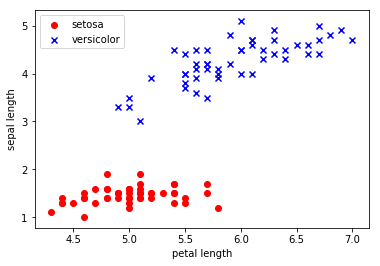

In [9]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

现在开始训练我们的感知机模型，为了更好地了解感知机训练过程，我们将每一轮的误分类数目可视化出来，检查算法是否收敛和找到分界线：

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [11]:
ppn.fit(X, y)

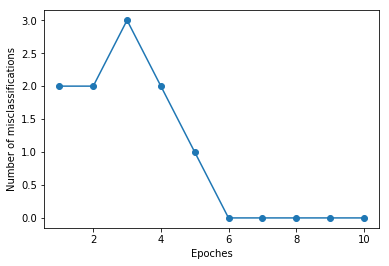

In [12]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassifications')
plt.show()

通过上图我们可以发现，第6次迭代时，感知机算法已经收敛了，対训练集的预测准确率是100%。接下来我们将分界线画出来：

In [13]:
from matplotlib.colors import ListedColormap

In [14]:
def plot_decision_region(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y==cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
    

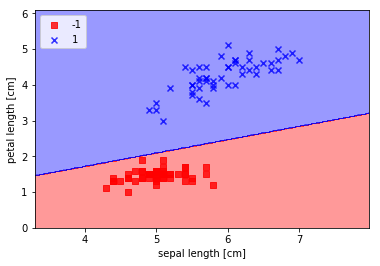

In [15]:
plot_decision_region(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

虽然对于Iris数据集，感知机算法表现的很完美，但是"收敛"一直是感知机算法中的一大问题。Frank Rosenblatt从数学上证明了只要两个类别能够被一个线性超平面分开，则感知机算法一定能够收敛。然而，如果数据并非线性可分，感知计算法则会一直运行下去，除非我们人为设置最大迭代次数n\_iter。 

## 自适应线性神经元及收敛问题


本节我们学习另一种单层神经网络：自适应线性神经元(ADAptive LInear NEuron, 简称Adaline)。在Frank Rosenblatt提出感知机算法不久，Bernard Widrow和他的博士生Tedd Hoff提出了Adaline算法作为感知机的改进算法(B.Widrow et al. Adaptive "Adaline" neuron using chemical "memistors".)


相对于感知机，Adaline算法有趣的多，因为在学习Adaline的过程中涉及到机器学习中一个重要的概念：最小化损失函数。学习Adaline为以后学习更复杂高端的算法(比如逻辑斯蒂回归、SVM等)起到抛砖引玉的作用。

Adaline和感知机的一个重要区别是Adaline算法中权重参数更新按照线性函数而不是单位阶跃函数。当然，Adaline中激活函数也简单的很，$$\phi(z)=\phi(w^{T}x)=w^{T}x$$

虽然Adaline中参数更新不是使用阶跃函数，但是在对测试集样本输出预测类别时还是使用阶跃函数，毕竟要输出离散值-1,1。

![](https://ooo.0o0.ooo/2016/06/11/575bcd008be3f.png)


### 使用梯度下降算法更新参数

有监督的机器学习(supervised machine learning)算法中，一个重要的概念就是定义目标函数(objective function)，而目标函数就是机器学习算法在学习过程中要优化的目标，目标函数也常被称为损失函数(cost function/loss function)。训练过程就是找到能使目标函数值最小的参数权重值。

对于Adaline算法，我们定义损失函数为样本真实值和预测值之间的误差平方和(Sum of Squared Erros, SSE):

$$\mathrm{J}(\mathrm{w}) = \frac{1}{2}\sum_{i}(y^{(i)}-\phi(z^{(i)}))^{2}$$


上式中的系数$\frac{1}{2}$完全是为了求导数方便而添加的，没有特殊的物理含义。相对于感知机中的单位阶跃函数，使用线性函数作为激活函数的一大优点是Adaline的损失函数是可导的。另一个很好的特性是Adaline的损失函数是凸函数，这样我们就可以使用传说中鼎鼎大名的的优化算法：梯度下降(gradient descent)来找到使损失函数取值最小的权重参数。



如下图所示，我们可以把梯度下降算法看做"下山过程"，直到遇到局部最小点或者全局最小点才会停止计算。在每一次迭代过程中，我们沿着梯度下降方向迈出一步，而步伐的大小由学习率和梯度大小共同决定。


![](https://ooo.0o0.ooo/2016/06/11/575cc3c888991.png)


使用梯度下降算法，实质就是运用损失函数的梯度来对参数进行更新：

$$\mathrm{w} := \mathrm{w} + \Delta \mathrm{w}$$

此时，$\Delta w$的值由负梯度乘以学习率$\eta$确定：

$$\Delta w = -\eta \Delta J(w)$$

而要计算出损失函数的梯度，我们需要计算损失函数对每一个权重参数的偏导数$w_{j}$:



$$\frac{\partial J}{\partial w_{j}}=-\sum_{i}(y^{(i)}-\phi(z^{(i)}))x_{j}^{(i)}$$

因此，$\Delta w_{j} = -\eta \frac{\partial J}{\partial w_{j}}=\eta \sum_{i}(y^{(i)}-\phi(z^{(i)}))x_{j}^{(i)} $.

注意所有权重参数还是同时更新的，所以Adaline算法的学习规则可以简写: $\bf{w}:=w+\Delta w$.



虽然简写以后的学习规则和感知机一样，但不要忘了$\phi(z)$的不同。此外，还有一点很大的不同是在计算$\Delta w$的过程中：Adaline需要用到所有训练集样本才能一次性更新所有的w，而感知机则是每次用一个训练样本更新所有权重参数。所以梯度下降法常被称为批量梯度下降 (**batch** gradient descent)。


**福利：**
详细的损失函数对权重的偏导数计算过程为：

$$\frac{\partial J}{\partial w_{j}}=\frac{\partial \frac{1}{2}\sum_{i}(y^{(i)}-\phi (z^{(i)}))^{2}}{\partial w_{j}}$$

$$=\frac{1}{2}\cdot \frac{\partial \sum_{i}(y^{(i)}-\phi (z^{(i)}))^{2}}{\partial w_{j}}$$

$$=\frac{1}{2}\sum_{i}2\cdot (y^{(i)}-\phi(z^{(i)}))\frac{\partial (y^{(i)}-\phi(z^{(i)}))}{\partial w_{j}}$$


$$=\sum_{i}(y^{(i)-\phi(z^{(i)})})\frac{\partial (y^{(i)}-\sum_{i}(w_{j}^{(i)}x_{j}^{(i)}))}{\partial w_{j}}$$

$$=\sum_{i}(y^{(i)}-\phi(z^{(i)}))(-x_{j}^{(i)})$$

$$=-\sum_{i}(y^{(i)}-\phi(z^{(i)}))x_{j}^{(i)}$$

## Python实现自适应线性神经元

既然感知机和Adaline的学习规则非常相似，所以在实现Adaline的时候我们不需要完全重写，而是在感知机代码基础上进行修改得到Adaline，具体地，我们需要修改fit方法，实现梯度下降算法:


In [21]:

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ----------------
    eta: float
    Learning rate (between 0.0 and 1.0)
    n_iter: int
    Passes over the training dataset.

    Attributes:
    ------------------
    w_: 1d-array
    Weights after fitting.
    errors_: int
    Number of misclassification in every epoch.

    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ---------------
        X: {array-like}, shape=[n_samples, n_features]
        Training vectors,
        y: array-like, shape=[n_samples]
        Target values.

        Returns
        -----------
        self: object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """ Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)



不像感知机那样每次用一个训练样本来更新权重参数，Adaline基于整个训练集的梯度来更新权重。

**注意，X.T.dot\(errors\)是一个矩阵和向量的乘法，可见numpy做矩阵计算的方便性。**
![](https://ooo.0o0.ooo/2016/06/15/576205a8994a9.png)

在将Adaline应用到实际问题中时，通常需要先确定一个好的学习率$\eta$这样才能保证算法真正收敛。我们来做一个试验，设置两个不同的$\eta$值：$\eta = 0.01, \eta=0.0001$。然后将每一轮的损失函数值画出来，窥探Adaline是如何学习的.

\(学习率$\eta$,迭代轮数n\_iter也被称为超参数\(hyperparameters\),超参数对于模型至关重要，在第四章我们将学习一些技巧，能够自动找到能使模型达到最好效果的超参数。\)


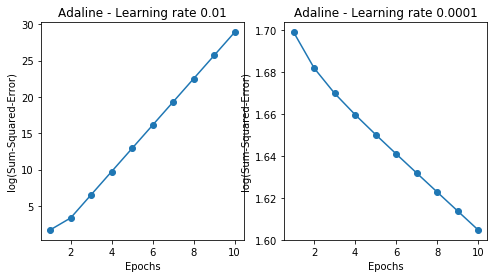

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared-Error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-Squared-Error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()




分析上面两幅图各自的问题，左图根本不是在最小化损失函数，反而在每一轮迭代过程中，损失函数值不断在增大！这说明取值过大的学习率不但对算法毫无益处反而危害大大滴。右图虽然能够在每一轮迭代过程中一直在减小损失函数的值，但是减小的幅度太小了，估计至少上百轮迭代才能收敛，而这个时间我们是耗不起的，所以学习率值过小就会导致算法收敛的时间巨长，使得算法根本不能应用于实际问题。

下面左图展示了权重再更新过程中如何得到损失函数$J(w)$最小值的。右图展示了学习率过大时权重更新，每次都跳过了最小损失函数对应的权重值。

![](https://ooo.0o0.ooo/2016/06/15/57620d14cfd33.png)

许多机器学习算法都要求先对特征进行某种缩放操作，比如标准化\(standardization\)和归一化\(normalization\)。而缩放后的特征通常更有助于算法收敛，实际上，对特征缩放后在运用梯度下降算法往往会有更好的学习效果。

特征标准化的计算很简单，比如要对第$j$维度特征进行标准化，只需要计算所有训练集样本中第$j$维度的平均值$u_{j}$和标准差$\sigma_{j}$即可,然后套公式：

$$x_{j}^{'}=frac{x_{j}-u_{j}}{\sigma_{j}}$$


标准化后的特征 均值为0，标准差为1。


在Numpy中，调用mean和std方法很容易对特征进行标准化:

In [23]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0]-X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1]-X[:, 1].mean()) / X[:, 1].std()

标准化后，我们用Adaline算法来训练模型，看看如何收敛的\(学习率为0.01\)：

In [24]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)


我们将决策界和算法学习情况可视化出来:

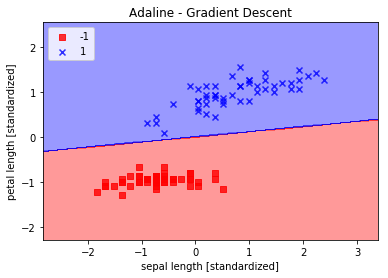

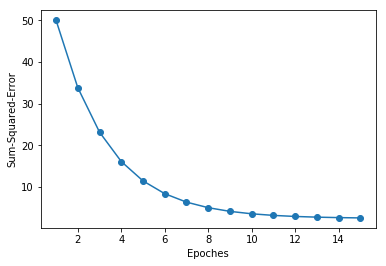

In [25]:
plot_decision_region(X_std, y, classifier=ada)

plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel("Epoches")
plt.ylabel("Sum-Squared-Error")
plt.show()

Wow 标准化后的数据再使用梯度下降Adaline算法竟然收敛了！ 注意看Sum-squared-error\(即，$y-w^{T}x$\)最后并没有等于0，即使所有样本都正确分类。

 

## 大规模机器学习和随机梯度下降

在上一节我们学习了如何使用梯度下降法最小化损失函数，由于梯度下降要用到所有的训练样本，因此也被称为批梯度下降\(batch gradient descent\)。现在想象一下我们有一个非常大的数据集，里面有几百万条样本，现在用梯度下降法来训练模型，可以想象计算量将是非常大，每一次求梯度都要用到所有的样本。能不能用少量的样本来求梯度呢？

随机梯度下降法\(stochastic gradient descent\)诞生啦！有时也被称为迭代\(iteration\)/在线\(on-line\)梯度下降。随机梯度下降法每次只用一个样本对权重进行更新\(唔，感知机算法也如此，转了一圈，历史又回到了起点。\)

$$\eta(y^{(i)}-\phi(z^{(i)}))x^{(i)}$$


虽然随机梯度下降被当作是梯度下降的近似算法，但实际上她往往比梯度下降收敛更快，因为相同时间内它对权重更新的更频繁。由于单个样本得到的损失函数相对于用整个训练集得到的损失函数具有随机性，反而会有助于随机梯度下降算法避免陷入局部最小点。在实际应用随机梯度下降法时，为了得到准确结果，一定要以随机方式选择样本计算梯度，通常的做法在每一轮迭代后将训练集进行打乱重排\(shuffle\)。

**Notes:**在随机梯度下降法中，通常用不断减小的自适应学习率替代固定学习率$\eta$,比如$\eta = \frac{c_{1}}{[number of iterations] + c_{2}}$,其中$c_{1},c_{2}$是常数。还要注意随机梯度下降并不能够保证使损失函数达到全局最小点，但结果会很接近全局最小。

随机梯度下降法的另一个优点是可以用于在线学习\(online learning\)。在线学习在解决不断累积的大规模数据时非常有用，比如，移动端的顾客数据。使用在线学习，系统可以实时更新并且如果存储空间快装不下数据了，可以将时间最久的数据删除。

**Notes** 除了梯度下降算法和随机梯度下降算法之外，还有一种常用的二者折中的算法：最小批学习\(mini-batch learning\)。很好理解，梯度下降每一次用全部训练集计算梯度更新权重，随机梯度法每一次用一个训练样本计算梯度更新权重，最小批学习每次用部分训练样本计算梯度更新权重，比如32。相对于梯度下降，最小批收敛速度也更快因为权重参数更新更加频繁。此外，最小批相对于随机梯度中，使用向量操作替代for循环，使得计算更快。

上一节我们已经实现了梯度下降求解Adaline，只需要做部分修改就能得到随机梯度下降法求解Adaline。第一个修改是fit方法内用每一个训练样本更新权重参数$w$,第二个修改是增加partial\_fit方法，第三个修改是增加shuffle方法打乱训练集顺序。


In [26]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ---------------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.

    Attributes
    ---------------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassification in every epoch.
    shuffle: bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles.
    random_state: int (default: None)
        Set random state for shuffling
        and initializing the weights.

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        """Fit training data.

        Parameters
        -----------
        X: {array-like}, shape=[n_samples, n_features]
        y: array-like, shape=[n_samples]

        Returns
        --------------
        self: object
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights."""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error ** 2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


\_shuffle方法的工作方式：调用numpy.random中的permutation函数得到0-100的一个随机序列，然后这个序列作为特征矩阵和类别向量的下标，就起到了shuffle的功能。

我们使用fit方法训练AdalineSGD模型，使用plot\_decision\_regions对训练结果画图:



In [27]:
ada = AdalineSGD(n_iter=150, eta=0.01, random_state=1)
ada.fit(X_std, y)

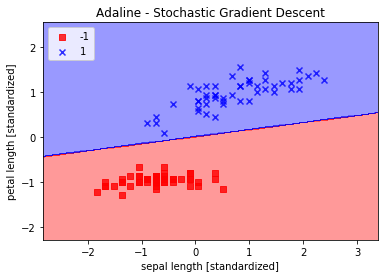

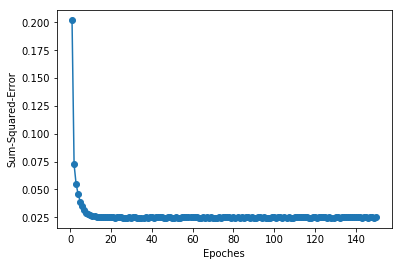

In [28]:
plot_decision_region(X_std, y, classifier=ada)

plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc="upper left")
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel("Epoches")
plt.ylabel("Sum-Squared-Error")
plt.show()

我们可以发现，平均损失\(average cost\)下降的非常快，在第15次迭代后决策界和使用梯度下降的Adaline决策界非常相似。如果我们要在在线环境下更新模型参数，通过调用partial\_fit方法即可，此时参数是一个训练样本，比如ada.partial\_fit\(X\_std\[0, :\], y\[0\]\)。

